<a href="https://colab.research.google.com/github/MiguelPerino/projects/blob/main/TesteDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Subrotinas para trabalhar com o banco de dados

In [ ]:
import sqlite3
import os

def criar_banco(nome_banco):

  try:

  # Cria o banco (se não existir) e fecha a conexão
    conn = sqlite3.connect(nome_banco)
    conn.close()

  # Verifica se o arquivo foi criado
    return os.path.exists(nome_banco)

  except Exception as e:

    conn.close()
    print(f"Erro ao criar banco: {e}")
    return False

In [ ]:
import sqlite3

def executar_sql(nome_banco, comando_sql):

  try:

    conn = sqlite3.connect(nome_banco)
    cursor = conn.cursor()
    cursor.executescript(comando_sql)
    # cursor.execute(comando_sql) <- este comando execute roda apenas um comando por vez
    conn.commit()
    conn.close()
    return True

  except Exception as e:

    print(f"Erro ao executar SQL: {e}")
    conn.rollback()
    conn.close()
    return False

In [ ]:
import sqlite3
import pandas as pd

def select_sql(nome_banco, comando_sql):

  try:
    conn = sqlite3.connect(nome_banco)
    df = pd.read_sql_query(comando_sql, conn)
    conn.close()
    return df

  except Exception as e:
    conn.close()
    print(f"Erro ao executar SELECT: {e}")
    return pd.DataFrame()

In [ ]:
import os

def apagar_banco(nome_banco):

  try:

    if os.path.exists(nome_banco):
      os.remove(nome_banco)
      return True
    else:
      print(f"Arquivo '{nome_banco}' não encontrado.")
      return False

  except Exception as e:

    print(f"Erro ao apagar o banco: {e}")
    return False

## Uso das Funções Básicas

In [ ]:
# Criando a Base de Dados

nome_do_bd = "minhabase.db"

if criar_banco(nome_do_bd):
    print("Banco criado com sucesso!")
else:
    print("Falha na criação do banco.")


In [ ]:
# Criando a Tabela

sql = """
  CREATE TABLE IF NOT EXISTS Pessoa (
    Id INTEGER PRIMARY KEY AUTOINCREMENT,
    Nome TEXT NOT NULL,
    DataNascimento TEXT
  );
"""
if executar_sql(nome_do_bd,sql):
    print("Comando executado com sucesso!")
else:
    print("Falha ao executar comando SQL.")

In [ ]:
# Inserindo um Registro

sql = """
  INSERT INTO Pessoa (Nome, DataNascimento) VALUES ('João Silva', '1990-05-12');
"""

if executar_sql(nome_do_bd, sql):
    print("Comando executado com sucesso!")
else:
    print("Falha ao executar comando SQL.")

In [ ]:
# Consultando o Banco de Dados

sql = "SELECT * FROM Pessoa"

df_resultado = select_sql(nome_do_bd, sql)
print(df_resultado)

In [ ]:
# Consultando o Banco de Dados

sql = "SELECT * FROM Pessoa"

df_resultado = select_sql(nome_do_bd, sql)
df_resultado

In [ ]:
# Apagando todos os Registros

sql = "delete from Pessoa"

if executar_sql(nome_do_bd, sql):
    print("Comando executado com sucesso!")
else:
    print("Falha ao executar comando SQL.")

In [ ]:
# Apagando a tabela

sql = "drop table Pessoa"

if executar_sql(nome_do_bd, sql):
    print("Comando executado com sucesso!")
else:
    print("Falha ao executar comando SQL.")

In [ ]:
# Apagar o arquivo de Banco de Dados

apagar_banco(nome_do_bd)

## Criando Tabelas

In [ ]:
def CreateTB (nome_do_bd, sql):

  if criar_banco(nome_do_bd):
    print("Banco criado com sucesso!")

    if executar_sql(nome_do_bd,sql):
      print("Comando executado com sucesso!")
    else:
      print("Falha ao executar comando SQL.")

  else:
    print("Falha na criação do banco.")

In [ ]:
# PRIMARY KEY
# Garante que o valor seja único e não nulo na coluna.

nome_do_bd = "minhabase.db"
sql = '''
CREATE TABLE usuarios (
    id INTEGER PRIMARY KEY,
    nome TEXT
);
'''
CreateTB(nome_do_bd, sql)

In [ ]:
# Listando as tabelas do banco de dados

nome_do_bd = "minhabase.db"
sql = '''
SELECT name
FROM sqlite_master
WHERE type = 'table';
'''
select_sql(nome_do_bd, sql)

In [ ]:
# inserindo e consultando os dados

nome_do_bd = "minhabase.db"

sql = '''
INSERT INTO usuarios (nome) VALUES ('João');
'''
executar_sql(nome_do_bd, sql)

sql = '''
SELECT * FROM usuarios;
'''
select_sql(nome_do_bd, sql)

In [ ]:
# NOT NULL
# Não permite valores nulos.

nome_do_bd = "minhabase.db"
sql = '''
CREATE TABLE clientes (
    id INTEGER PRIMARY KEY,
    nome TEXT NOT NULL
);
'''
CreateTB(nome_do_bd, sql)

In [ ]:
# inserindo e consultando os dados

nome_do_bd = "minhabase.db"

sql = '''
INSERT INTO clientes (nome) VALUES (Null);
'''
executar_sql(nome_do_bd, sql)

sql = '''
SELECT * FROM clientes;
'''
select_sql(nome_do_bd, sql)

In [ ]:
# UNIQUE
# Garante que o valor seja único em todas as linhas.

nome_do_bd = "minhabase.db"
sql = '''
CREATE TABLE produtos (
    id INTEGER PRIMARY KEY,
    codigo TEXT UNIQUE,
    nome TEXT
);
'''
CreateTB(nome_do_bd, sql)

In [ ]:
nome_do_bd = "minhabase.db"

sql = '''
INSERT INTO produtos (codigo, nome) VALUES (1, "Coxinha");
'''
executar_sql(nome_do_bd, sql)

sql = '''
SELECT * FROM produtos;
'''
select_sql(nome_do_bd, sql)

In [ ]:
# CHECK
# Verifica uma condição antes de aceitar o valor.

nome_do_bd = "minhabase.db"
sql = '''
CREATE TABLE pedidos (
    id INTEGER PRIMARY KEY,
    quantidade INTEGER CHECK(quantidade > 0),
    status TEXT CHECK(status IN ('Pendente', 'Pago', 'Cancelado'))
);
'''
CreateTB(nome_do_bd, sql)

In [ ]:
nome_do_bd = "minhabase.db"

sql = '''
INSERT INTO pedidos (quantidade, status) VALUES (10, "Pago");
'''
executar_sql(nome_do_bd, sql)

sql = '''
SELECT * FROM pedidos;
'''
select_sql(nome_do_bd, sql)

In [ ]:
# DEFAULT
# Define um valor padrão quando nenhum valor é informado.

nome_do_bd = "minhabase.db"
sql = '''
CREATE TABLE mensagens (
    id INTEGER PRIMARY KEY,
    texto TEXT,
    data_criacao TEXT DEFAULT (datetime('now'))
);
'''
CreateTB(nome_do_bd, sql)

In [ ]:
nome_do_bd = "minhabase.db"

sql = '''
INSERT INTO mensagens (texto) VALUES ("Boa noite!!!");
'''
executar_sql(nome_do_bd, sql)

sql = '''
SELECT * FROM mensagens;
'''
select_sql(nome_do_bd, sql)

In [ ]:
# FOREIGN KEY
# Garante integridade referencial entre tabelas.

nome_do_bd = "minhabase.db"

sql = '''
PRAGMA foreign_keys = ON; -- Ativar chave estrangeira no SQLite
'''
executar_sql(nome_do_bd, sql)

sql = '''
drop table produtos;
'''
executar_sql(nome_do_bd, sql)

sql = '''
CREATE TABLE categorias (
    id INTEGER PRIMARY KEY,
    nome TEXT
);
'''
CreateTB(nome_do_bd, sql)

sql = '''
CREATE TABLE produtos (
    id INTEGER PRIMARY KEY,
    nome TEXT,
    categoria_id INTEGER,
    FOREIGN KEY (categoria_id) REFERENCES categorias(id)
);
'''
CreateTB(nome_do_bd, sql)

In [ ]:
nome_do_bd = "minhabase.db"

sql = '''
INSERT INTO categorias (nome) VALUES ("Informática");
'''
executar_sql(nome_do_bd, sql)

sql = '''
INSERT INTO produtos (nome, categoria_id) VALUES ("Notebook", 1);
'''
executar_sql(nome_do_bd, sql)

sql = '''
SELECT * FROM produtos;
'''
select_sql(nome_do_bd, sql)

Resumo das constraints do SQLite:

*   PRIMARY KEY → Identificador único.
*   NOT NULL → Impede valores nulos.
*   UNIQUE → Impede valores duplicados.
*   CHECK → Valida condições.
*   DEFAULT → Define valor padrão.
*   FOREIGN KEY → Liga tabelas mantendo integridade.

## Tipos de Constraint

In [ ]:
# Alternativa sem regex
# Se você não quiser criar funções externas, é possível usar funções nativas (LIKE, GLOB, SUBSTR) para validações simples, por exemplo:

nome_do_bd = "minhabase.db"
sql = '''
CREATE TABLE telefones (
    id INTEGER PRIMARY KEY,
    numero TEXT CHECK(numero GLOB '[0-9][0-9][0-9]-[0-9][0-9][0-9]')
);

CREATE TABLE emails (
    id INTEGER PRIMARY KEY,
    endereco TEXT NOT NULL CHECK(endereco GLOB '*@*.*')
);

CREATE TABLE ceps (
    id INTEGER PRIMARY KEY,
    cep TEXT NOT NULL CHECK(cep GLOB '[0-9][0-9][0-9][0-9][0-9]-[0-9][0-9][0-9]')
);
'''
CreateTB(nome_do_bd, sql)

In [ ]:
nome_do_bd = "minhabase.db"

sql = '''
INSERT INTO telefones (numero) VALUES ("123-123");
'''
executar_sql(nome_do_bd, sql)

sql = '''
SELECT * FROM telefones;
'''
select_sql(nome_do_bd, sql)

Limitações do GLOB:


*   Não suporta quantificadores complexos como {1,3}, +, ?, |.
*   É case sensitive por padrão (para ignorar maiúsculas/minúsculas, use COLLATE NOCASE).
*   Só funciona para padrões simples, mas é suficiente para formatos fixos.


In [ ]:
# Chaves Primárias
# Simples ou Composta

nome_do_bd = "minhabase.db"
sql = '''
CREATE TABLE clientes (
    id INTEGER PRIMARY KEY,  -- PK simples
    nome TEXT NOT NULL
);


CREATE TABLE matriculas (
    id_aluno INTEGER,
    id_curso INTEGER,
    data_matricula TEXT,
    PRIMARY KEY (id_aluno, id_curso) -- PK composta
);
'''
CreateTB(nome_do_bd, sql)

In [ ]:
# Chaves Extrangeira
# Simples ou Composta

nome_do_bd = "minhabase.db"
sql = '''

PRAGMA foreign_keys = ON;

CREATE TABLE categorias (
    id INTEGER PRIMARY KEY,
    nome TEXT NOT NULL
);

CREATE TABLE produtos (
    id INTEGER PRIMARY KEY,
    nome TEXT NOT NULL,
    categoria_id INTEGER,
    FOREIGN KEY (categoria_id) REFERENCES categorias(id)
);
'''
CreateTB(nome_do_bd, sql)

In [ ]:
# Chaves Extrangeira
# Simples ou Composta

nome_do_bd = "minhabase.db"
sql = '''

PRAGMA foreign_keys = ON;

CREATE TABLE categorias (
    id INTEGER PRIMARY KEY,
    nome TEXT NOT NULL
);


CREATE TABLE produtos (
    id INTEGER PRIMARY KEY,
    nome TEXT NOT NULL,
    categoria_id INTEGER,
    FOREIGN KEY (categoria_id) REFERENCES categorias(id)
        ON DELETE CASCADE   -- Se apagar a categoria, apaga os produtos
        ON UPDATE CASCADE   -- Se atualizar o id da categoria, atualiza nos produtos
);
'''
CreateTB(nome_do_bd, sql)

In [ ]:
# Cada vez que você insere uma nova linha sem informar id, o SQLite gera automaticamente um valor único crescente.
# Isso é suficiente para a maioria dos casos.

nome_do_bd = "minhabase.db"
sql = '''

CREATE TABLE clientes (
    id INTEGER PRIMARY KEY,  -- auto incremento implícito
    nome TEXT NOT NULL
);

'''
CreateTB(nome_do_bd, sql)

In [ ]:
# Sem AUTOINCREMENT, o SQLite pode reutilizar valores de id de linhas deletadas.
# Com AUTOINCREMENT, o próximo valor sempre será maior do que qualquer id já usado.

nome_do_bd = "minhabase.db"
sql = '''

CREATE TABLE produtos (
    id INTEGER PRIMARY KEY AUTOINCREMENT,  -- garante nunca reutilizar ids
    nome TEXT NOT NULL
);
'''
CreateTB(nome_do_bd, sql)

Resumo

Tipo	Comportamento

  INTEGER PRIMARY KEY	Auto incremento automático (reutiliza ids de linhas deletadas)

  INTEGER PRIMARY KEY AUTOINCREMENT	Auto incremento sem reutilizar ids, sempre crescente

## Tipos de Dados no SQLite

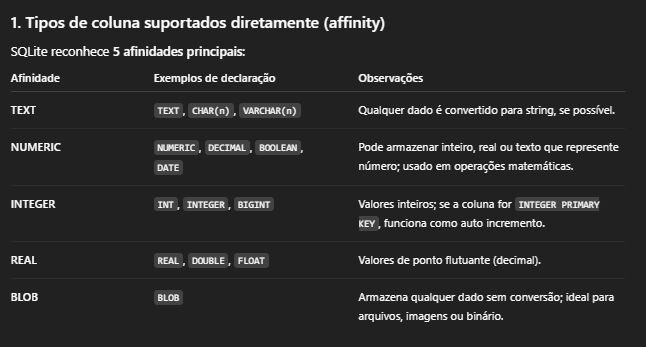

Como o SQLite trata os tipos

  SQLite não força que um valor seja de um tipo específico.

  Ele tenta converter valores para a afinidade da coluna quando possível.

In [ ]:
sql = '''
CREATE TABLE exemplo (
    texto TEXT,
    numero INTEGER,
    decimal REAL
);

INSERT INTO exemplo (texto, numero, decimal) VALUES ('123', '456', '7.89');

SELECT * FROM exemplo;

'''

**Tipos especiais reconhecidos**

Além das 5 afinidades, você pode usar tipos como:

  BOOLEAN → tratado como NUMERIC (0 ou 1)

  DATE / DATETIME → tratado como NUMERIC ou TEXT (depende do formato)

  CHAR(n) / VARCHAR(n) → tratado como TEXT, tamanho não é imposto

**Resumo**

  SQLite não tem restrição rígida de tipo; é mais flexível que MySQL ou PostgreSQL.

  Coluna INTEGER PRIMARY KEY é especial: atua como rowid e pode auto incrementar.

  TEXT, NUMERIC, INTEGER, REAL, BLOB são as cinco afinidades principais que cobrem todos os tipos comuns.

In [ ]:
# Como o SQLite trata os tipos
# SQLite não força que um valor seja de um tipo específico.
# Ele tenta converter valores para a afinidade da coluna quando possível.

sql = '''
CREATE TABLE exemplo (
    texto TEXT,
    numero INTEGER,
    decimal REAL
);

INSERT INTO exemplo (texto, numero, decimal) VALUES ('123', '456', '7.89');

SELECT * FROM exemplo;
'''

Tipos especiais reconhecidos

Além das 5 afinidades, você pode usar tipos como:

*   BOOLEAN → tratado como NUMERIC (0 ou 1)
*   DATE / DATETIME → tratado como NUMERIC ou TEXT (depende do formato)
*   CHAR(n) / VARCHAR(n) → tratado como TEXT, tamanho não é imposto


Resumo

*   SQLite não tem restrição rígida de tipo; é mais flexível que MySQL ou PostgreSQL.
*   Coluna INTEGER PRIMARY KEY é especial: atua como rowid e pode auto incrementar.
*   TEXT, NUMERIC, INTEGER, REAL, BLOB são as cinco afinidades principais que cobrem todos os tipos comuns.

In [ ]:
# Qual a diferença entre os tipos TEXT, CHAR e VARCHAR

TEXT

  Armazena cadeias de caracteres de tamanho variável.

  Não tem limite de tamanho (exceto o limite máximo do SQLite, que é enorme ~2 GB por campo).

  Ideal quando você não quer se preocupar com tamanho específico.

CHAR(n)

  Destinado a armazenar cadeias de tamanho fixo.

  Em outros bancos, sempre ocupa exatamente n caracteres, preenchendo com espaços à direita se necessário.

  No SQLite, o tamanho n não é imposto; CHAR(n) é tratado como TEXT.
  
  Mesmo se você inserir 'AB', o SQLite armazena 'AB' sem preencher com espaços.

VARCHAR(n)

  Destinado a armazenar cadeias de tamanho variável até n caracteres.

  Em outros bancos, impede inserir strings maiores que n.

  No SQLite, o tamanho n não é imposto, VARCHAR(n) também é tratado como TEXT.

  Você pode inserir até ou mais que 50 caracteres; o SQLite aceita tudo.

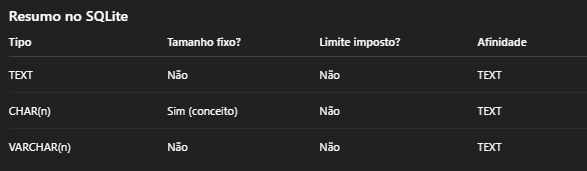

In [ ]:
# Qual a diferença entre NUMERIC, DECIMAL

NUMERIC

Afinidade: NUMERIC

Aceita valores inteiros, reais ou texto, tentando converter para número se possível.

Usado quando você quer armazenar valores que podem ser inteiros ou decimais.

Também pode ser usado para booleanos (0/1) e datas (dependendo do formato).

In [ ]:
sql = '''
CREATE TABLE exemplo_numeric (
    valor NUMERIC
);

INSERT INTO exemplo_numeric (valor) VALUES ('123');   -- armazenado como INTEGER
INSERT INTO exemplo_numeric (valor) VALUES ('45.67'); -- armazenado como REAL

'''

DECIMAL / NUMERIC(p,s)

Afinidade: NUMERIC

Conceito SQL padrão: número com precisão fixa

p = total de dígitos

s = dígitos após a vírgula

No SQLite, o tamanho e a precisão não são aplicados; o tipo é tratado como NUMERIC.

Serve mais como documentação sem efeito prático no SQLite.

In [ ]:
sql = '''
CREATE TABLE exemplo_decimal (
    preco DECIMAL(10,2)
);

INSERT INTO exemplo_decimal (preco) VALUES (123.45); -- armazenado como REAL
INSERT INTO exemplo_decimal (preco) VALUES ('67.89'); -- convertido para REAL
'''

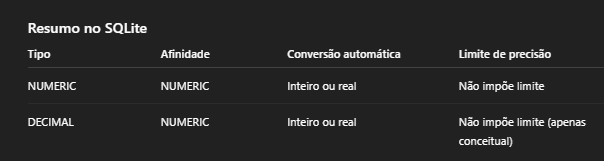

In [ ]:
# Qual a diferença entre os tipos INT, INTEGER, BIGINT

INT

Sinônimo de INTEGER na maioria dos bancos de dados SQL.

No SQLite, INT é tratado com afinidade INTEGER, exatamente como INTEGER.

É mais usado por convenção ou compatibilidade com outros bancos.

INTEGER

Afinidade: INTEGER

Usado para armazenar valores inteiros de qualquer tamanho.

No SQLite, se a coluna for INTEGER PRIMARY KEY, ela funciona como rowid auto-incremento.

Aceita valores pequenos ou grandes (até 8 bytes, ou ±9 quintilhões aproximadamente).

BIGINT

Conceito SQL padrão: inteiro de 64 bits, para valores muito grandes.

No SQLite, BIGINT também é tratado como INTEGER.

Não há diferença prática entre INTEGER e BIGINT no SQLite.

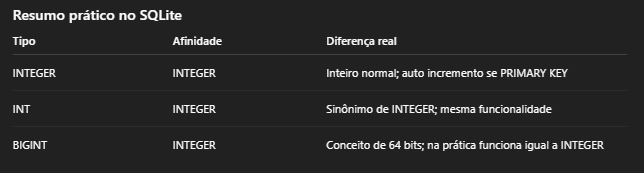

In [ ]:
# Qual a diferença entre os tipos REAL, DOUBLE, FLOAT

REAL

Afinidade: REAL

Armazena números de ponto flutuante de precisão dupla (8 bytes, equivalente a double em C).

Ideal para cálculos com decimais e valores que não precisam de precisão fixa.

DOUBLE / DOUBLE PRECISION

Conceito SQL: número de ponto flutuante de precisão dupla (8 bytes).

No SQLite, DOUBLE é tratado como REAL, sem diferença prática.

FLOAT

Conceito SQL padrão: número de ponto flutuante de precisão simples (4 bytes).

No SQLite, FLOAT também é tratado como REAL (8 bytes).

Ou seja, não há armazenamento de precisão simples — tudo é convertido para REAL de precisão dupla.

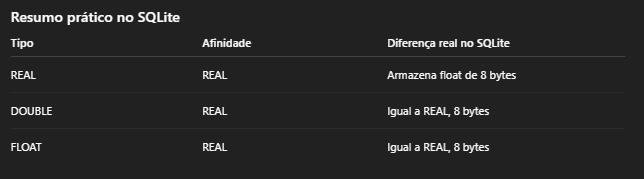